# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Extraction

In [2]:
# https://www.autoscout24.es/?genlnk=navi&genlnkorigin=gb-all-all-home
df = pd.read_csv('../../datasets/autos alemanes.csv')
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


# Analyzing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [4]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [5]:
df.fuel.value_counts()

Gasoline             28864
Diesel               15244
Electric/Gasoline     1158
Electric               758
LPG                    126
CNG                    117
Others                  56
Electric/Diesel         53
-/- (Fuel)              26
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

In [6]:
df.gear.value_counts()

Manual            30380
Automatic         15787
Semi-automatic       56
Name: gear, dtype: int64

In [7]:
# find nulls
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [8]:
# find duplicateds
df[df.duplicated()]

,mileage,make,model,fuel,gear,offerType,price,hp,year
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
201,9,Toyota,Aygo,Gasoline,Manual,Pre-registered,11490,72.0,2021
202,9,Toyota,Aygo,Gasoline,Manual,Pre-registered,11490,72.0,2021
207,10,Toyota,Aygo,Gasoline,Manual,Pre-registered,11990,72.0,2021
208,10,Toyota,Aygo,Gasoline,Manual,Pre-registered,11990,72.0,2021
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


# Data Cleaning

In [9]:
# since the amount of missing values is less than 1% we can drop them without any problem
df.dropna(inplace=True)
df.isna().sum()


mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [10]:
# droping duplicateds
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,mileage,make,model,fuel,gear,offerType,price,hp,year


In [11]:
df.shape

(43947, 9)

# Transformation

In [12]:
df['age'] = datetime.now().year - df['year']
df['age']

0        10
1        10
2        10
3        10
4        10
         ..
46394     0
46396     0
46397     0
46398     0
46399     0
Name: age, Length: 43947, dtype: int64

# Exploratory Data Analysis

In [13]:
# getting price Median and media
M = df.price.median()
print(M)
m = df.price.mean()
print(m)

10990.0
16546.56379275036


In [14]:
# getting values blow and above Median
below_M = df[(df.price<=M)]
no_below_M = below_M.value_counts().sum()
print(no_below_M)

above_M = df[(df.price>M)]
no_above_M = above_M.value_counts().sum()
print(no_above_M)

22101
21846


In [15]:
# getting values blow and above Median
below_m = df[(df.price<=m)]
no_below_m = below_m.value_counts().sum()
print(no_below_m)

above_m = df[(df.price>m)]
no_above_m = above_m.value_counts().sum()
print(no_above_m)

30497
13450


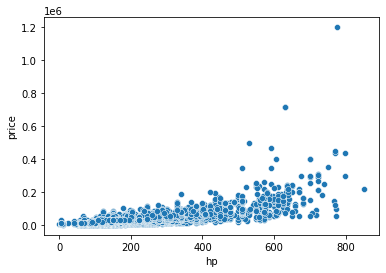

In [16]:
# identifing outliers
sns.scatterplot(x=df.hp, y=df.price);

In [17]:
# Changing fuel from categorical to integer values
df['fuel_numeric'] = df['fuel']
df['fuel_numeric'] = df['fuel_numeric'].replace('Diesel', 0)
df['fuel_numeric'] = df['fuel_numeric'].replace('Gasoline', 1)
df['fuel_numeric'] = df['fuel_numeric'].replace(['Electric/Gasoline', 'Electric/Diesel', 'Electric'],  2)
df['fuel_numeric'] = df['fuel_numeric'].replace(['CNG', 'LPG', 'Others', '-/- (Fuel)', 'Ethanol', 'Hydrogen'], 3)
df['fuel_numeric']

0        0
1        1
2        1
3        1
4        1
        ..
46394    1
46396    2
46397    2
46398    2
46399    1
Name: fuel_numeric, Length: 43947, dtype: int64

In [18]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year', 'age', 'fuel_numeric'],
      dtype='object')

In [19]:
df_corr = df[['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp', 'age', 'fuel_numeric']]

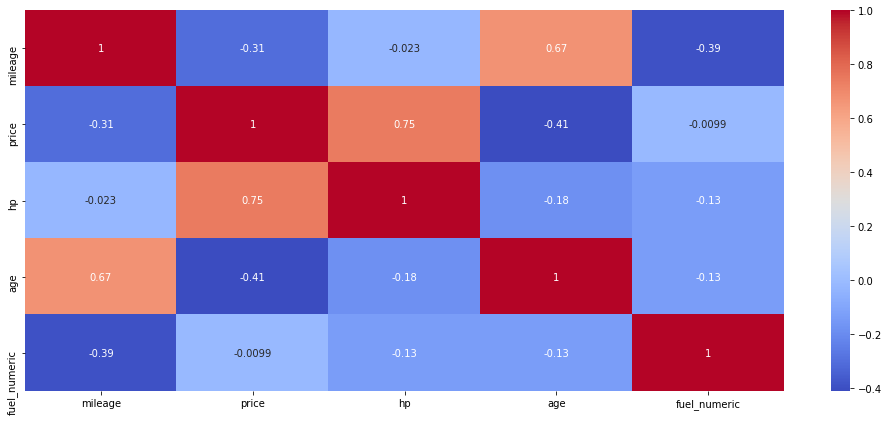

In [20]:
plt.figure(figsize=(17,7))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
del df_corr

## Selecting most popular cars

In [21]:
min_price, max_price = df.price.quantile([0.01, 0.99])
min_price, max_price

(3300.0, 83468.84000000004)

In [22]:
popular_cars = df[(df.price > min_price)&(df.price < max_price)]
len(popular_cars)

43044

In [23]:
min_mileage, max_mileage = popular_cars.mileage.quantile([0.01, 0.99])
min_mileage, max_mileage

(7.0, 258000.0)

In [24]:
popular_cars = popular_cars[(popular_cars.mileage > min_mileage)&(popular_cars.mileage < max_mileage)]
len(popular_cars)

42153

In [25]:
min_hp, max_hp = popular_cars.hp.quantile([0.01, 0.99])
min_hp, max_hp

(60.0, 381.0)

In [26]:
popular_cars = popular_cars[(popular_cars.hp > min_hp)&(popular_cars.hp < max_hp)]
len(popular_cars)

39921

In [27]:
popular_cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,age,fuel_numeric
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,10,0
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,10,1
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,10,1
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,10,1
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,10,1


In [28]:
# Changing fuel type to categorical value and reset index
popular_cars['fuel'] = popular_cars['fuel_numeric']
popular_cars['fuel'] = popular_cars['fuel'].replace(0, 'Diesel')
popular_cars['fuel'] = popular_cars['fuel'].replace(1, 'Gasoline')
popular_cars['fuel'] = popular_cars['fuel'].replace(2, 'Electric')
popular_cars['fuel'] = popular_cars['fuel'].replace(3, 'Others')
popular_cars['fuel'].value_counts()

Gasoline    24278
Diesel      13996
Electric     1386
Others        261
Name: fuel, dtype: int64

In [29]:
popular_cars.drop(['make','model','year','fuel_numeric'], axis=1, inplace=True)
popular_cars.head()

,mileage,fuel,gear,offerType,price,hp,age
0,235000,Diesel,Manual,Used,6800,116.0,10
1,92800,Gasoline,Manual,Used,6877,122.0,10
2,149300,Gasoline,Manual,Used,6900,160.0,10
3,96200,Gasoline,Manual,Used,6950,110.0,10
4,156000,Gasoline,Manual,Used,6950,156.0,10


# One-Hot encoding and K-folds

In [30]:
popular_cars.dtypes.value_counts()

object     3
int64      3
float64    1
dtype: int64

In [31]:
# mask data
mask = popular_cars.dtypes == object
categorical = popular_cars.columns[mask]
categorical

Index(['fuel', 'gear', 'offerType'], dtype='object')

In [32]:
num_ohc_cols = (popular_cars[categorical].apply(lambda x: x.nunique()).sort_values(ascending=False))
num_ohc_cols

offerType    5
fuel         4
gear         3
dtype: int64

In [33]:
data_ohc = popular_cars.copy()
ohc = OneHotEncoder

In [34]:
for col in num_ohc_cols.items():
    print(col)

('offerType', 5)
('fuel', 4)
('gear', 3)


In [35]:
for col in num_ohc_cols.index:
    # this is a sparse array
    new_dat = ohc.fit_transform(data_ohc[col])
    new_dat
    # #drop original column from original DF
    # data_ohc = data_ohc.drop(col, axis=1)
    # #get unique names of columns
    # cats = ohc.categories_
    # #create a column for each OHE column by value
    # new_cols = ['_'.join([col,cat]) for cat in cats[0]]
    # #create the new Dataset
    # new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
    # #append new data to df
    # data_ohc=pd.concat([data_ohc, new_df], axis=1)

# y_col = 'price'
# feature_cols = [x for x in data_ohc.columns if x != y_col]
# feature_cols
# X = data_ohc[feature_cols]
# y = data_ohc[y_col]

TypeError: fit_transform() missing 1 required positional argument: 'X'